<img src="https://www.luxonis.com/logo.svg" width="400">

In [ ]:
!pip install datadreamer

In [ ]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from datadreamer.dataset_annotation import OWLv2Annotator
from datadreamer.image_generation import (
    StableDiffusionTurboImageGenerator,
)
from datadreamer.prompt_generation import LMPromptGenerator


## Prompt generation

In [3]:
# Define objects you want to generate
object_names = ["aeroplane", "car", "person", "unicorn"]
prompt_generator = LMPromptGenerator(
    class_names=object_names,
    prompts_number=10,
    num_objects_range = [1, 2], # How many objects included in a prompt
    seed = 42,
)

Loading FP16 language model on GPU...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Done!


In [4]:
# Generate prompts using Language model
generated_prompts = prompt_generator.generate_prompts()
print(generated_prompts)

Generating prompts...:  70%|███████   | 7/10 [00:23<00:09,  3.17s/it]/opt/conda/lib/python3.11/site-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
Generating prompts...: 100%|██████████| 10/10 [00:35<00:00,  3.54s/it]

[(['aeroplane'], 'A photo of an aeroplane soaring over a cityscape at sunset, casting a golden glow over the rooftops and creating a stunning backdrop for the bustling metropolis below.'), (['car', 'aeroplane'], 'A photo of a car and a helicopter in the city skyline, showing the coexistence of man-made machines in urban life.'), (['unicorn'], 'A photo of majestic unicorns frolicking in a lush green meadow, surrounded by vibrant wildflowers and the clear blue sky.'), (['car'], 'A photo of car: A rusty old car sits abandoned in a fields, surrounded by towering wheat stalks. The cars doors are thrown open, revealing a worn-out interior. The scene is bathed in the golden light of the setting sun, casting shadows across the field.'), (['aeroplane'], 'A photo of an aeroplane soaring over a beautiful sunset and a bustling city.'), (['unicorn'], 'A photo of unicorns grazing in a serene meadow, their ethereal beauty and pureness illuminating the scene.'), (['aeroplane', 'unicorn'], 'A photo of 

In [5]:
prompt_generator.release(empty_cuda_cache=True)

## Image generation

In [6]:
# Initialize the image generator, optionally try different prompt_prefix, prompt_suffix and negative_prompt
image_generator = StableDiffusionTurboImageGenerator(
    seed = 42.0,
    #prompt_prefix =  "",
    #prompt_suffix = ", hd, 8k, highly detailed",
    #negative_prompt= "cartoon, blue skin, painting, scrispture, golden, illustration, worst quality, low quality, normal quality:2, unrealistic dream, low resolution,  static, sd character, low quality, low resolution, greyscale, monochrome, nose, cropped, lowres, jpeg artifacts, deformed iris, deformed pupils, bad eyes, semi-realistic worst quality, bad lips, deformed mouth, deformed face, deformed fingers, bad anatomy",
)

Loading SDXL Turbo on GPU...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
prompts = [p[1] for p in generated_prompts]
prompt_objects = [p[0] for p in generated_prompts]

In [8]:
# Generate images from the generated prompts
generated_images = []
for generated_images_batch in image_generator.generate_images(prompts):
    generated_images.extend(generated_images_batch)

Generating images:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  10%|█         | 1/10 [01:45<15:47, 105.22s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  20%|██        | 2/10 [01:50<06:10, 46.36s/it] 

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  30%|███       | 3/10 [01:54<03:10, 27.19s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  40%|████      | 4/10 [01:59<01:48, 18.14s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  50%|█████     | 5/10 [02:03<01:05, 13.09s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  60%|██████    | 6/10 [02:07<00:40, 10.05s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  70%|███████   | 7/10 [02:11<00:24,  8.13s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  80%|████████  | 8/10 [02:15<00:13,  6.85s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images:  90%|█████████ | 9/10 [02:19<00:06,  6.00s/it]

  0%|          | 0/4 [00:00<?, ?it/s]

Generating images: 100%|██████████| 10/10 [02:24<00:00, 14.40s/it]


(['aeroplane'], 'A photo of an aeroplane soaring over a cityscape at sunset, casting a golden glow over the rooftops and creating a stunning backdrop for the bustling metropolis below.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x79D01CD488D0>


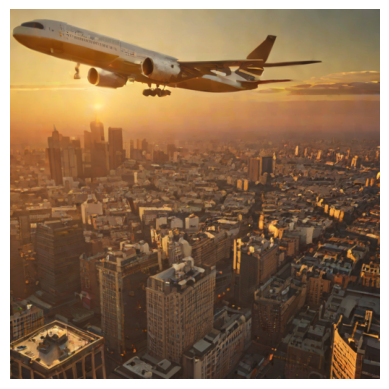

(['car', 'aeroplane'], 'A photo of a car and a helicopter in the city skyline, showing the coexistence of man-made machines in urban life.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x79D01CD34E90>


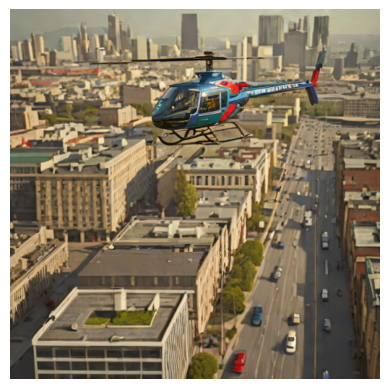

(['unicorn'], 'A photo of majestic unicorns frolicking in a lush green meadow, surrounded by vibrant wildflowers and the clear blue sky.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x79D01CD110D0>


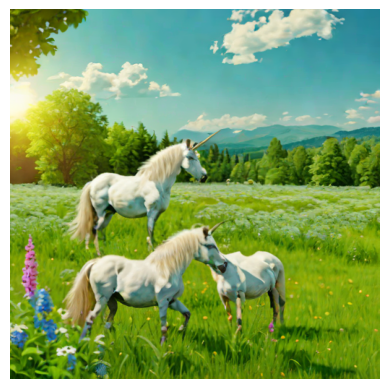

(['car'], 'A photo of car: A rusty old car sits abandoned in a fields, surrounded by towering wheat stalks. The cars doors are thrown open, revealing a worn-out interior. The scene is bathed in the golden light of the setting sun, casting shadows across the field.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x79D01C60EF50>


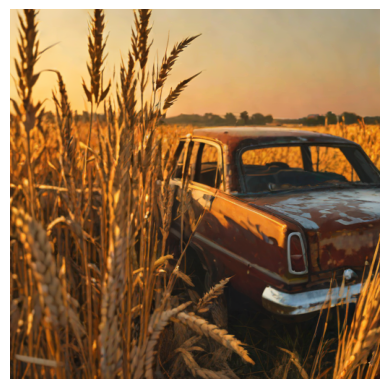

(['aeroplane'], 'A photo of an aeroplane soaring over a beautiful sunset and a bustling city.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x79D01CD38D50>


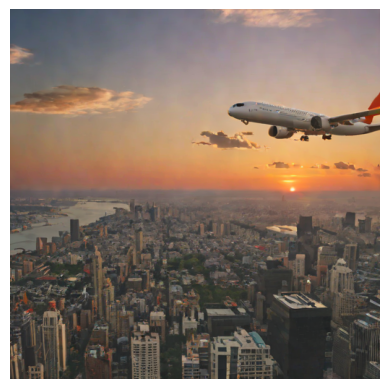

(['unicorn'], 'A photo of unicorns grazing in a serene meadow, their ethereal beauty and pureness illuminating the scene.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x79D01CD3C410>


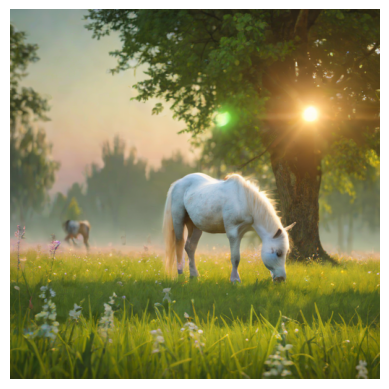

(['aeroplane', 'unicorn'], 'A photo of an aeroplane and a unicorn soaring above the clouds in the sunset - A serene image of two majestic creatures, gracefully flying together in harmony.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x79D01C60EE90>


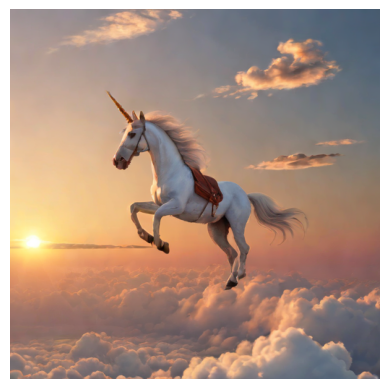

(['car'], 'A photo of a car. A sleek, red sports car speeds down a winding mountain road, surrounded by the breathtaking views of a scenic landscape.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x79D02C468B10>


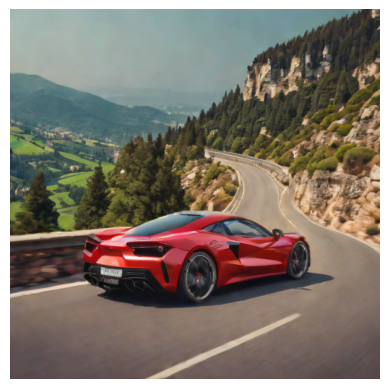

(['aeroplane', 'car'], 'A photo of aeroplane flying above a busy city, soaring high above the buildings and the cars below.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x79D01CD10C10>


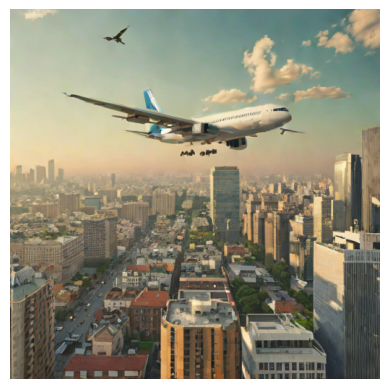

(['person', 'aeroplane'], 'A photo of a person waving goodbye to an aeroplane, as they bid farewell to a loved one who has left for a foreign land. The image captures the bittersweet moment of separation and the longing for a loved one to return, set against the backdrop of an aeroplane.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x79D01C81D9D0>


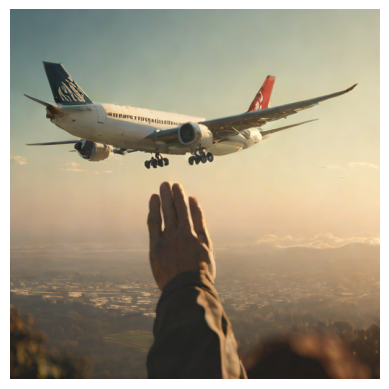

In [9]:
# Visualize images
for img, prompt in zip(generated_images, generated_prompts):
    print(prompt)
    plt.imshow(img)
    print(img)
    plt.axis("off")  # Hide the axis
    plt.show()


In [10]:
image_generator.release(empty_cuda_cache=True)

In [11]:
annotator = OWLv2Annotator(
    seed=42,
    device="cuda",  # Use "cuda" for GPU or "cpu" for CPU
)

/opt/conda/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Box: [     4.2461      16.827         432      123.22], Score: 0.7587799429893494, Label: aeroplane


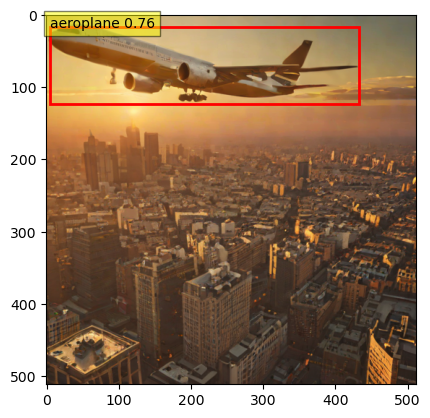

Box: [     364.91      356.44      377.54      374.48], Score: 0.473535418510437, Label: car
Box: [     308.36      474.38      326.47      502.78], Score: 0.465935617685318, Label: car
Box: [     433.63      427.97      444.59      446.93], Score: 0.42290574312210083, Label: car
Box: [     381.26      444.88      396.87      476.67], Score: 0.4184935986995697, Label: car
Box: [     430.44       386.9      440.69      405.43], Score: 0.4008847177028656, Label: car
Box: [     383.88      420.98      401.15       437.9], Score: 0.3937722146511078, Label: car
Box: [     334.68      410.21       350.3      438.68], Score: 0.34388288855552673, Label: car
Box: [     118.65      53.802      431.21      192.09], Score: 0.32858413457870483, Label: aeroplane
Box: [     390.24      317.56      398.45      330.67], Score: 0.32187193632125854, Label: car
Box: [     452.07      386.88      460.04      398.14], Score: 0.31633344292640686, Label: car
Box: [     430.39      309.24      442.11      332.

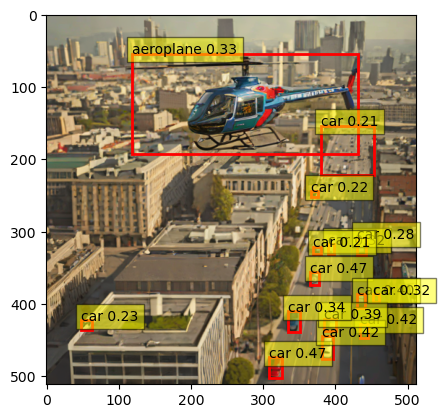

Box: [     72.778      292.77      304.77      468.08], Score: 0.5330172181129456, Label: unicorn
Box: [     75.399      179.59      277.52      341.63], Score: 0.5173842310905457, Label: unicorn
Box: [     251.94      297.11      383.14      455.58], Score: 0.4911048412322998, Label: unicorn


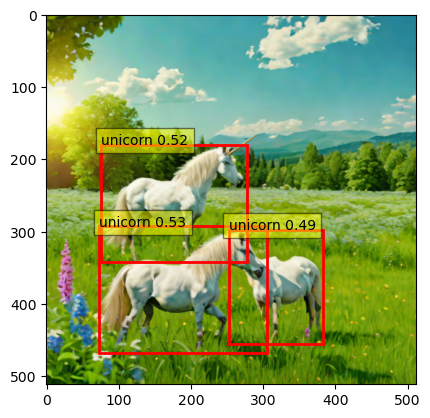

Box: [     198.25      163.26      511.48      464.36], Score: 0.2707500159740448, Label: car


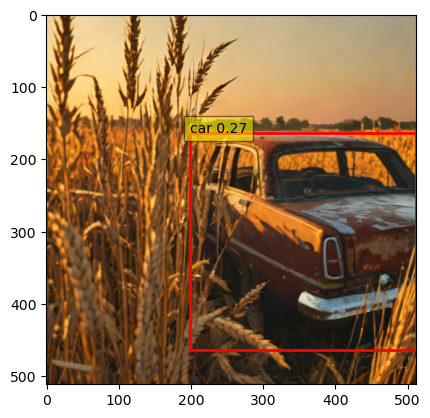

Box: [      298.6      101.41       510.8      185.35], Score: 0.6498174667358398, Label: aeroplane


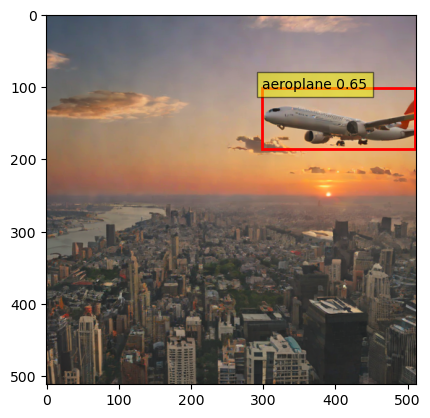

Box: [     208.75      225.62      394.23      382.08], Score: 0.4725264012813568, Label: unicorn


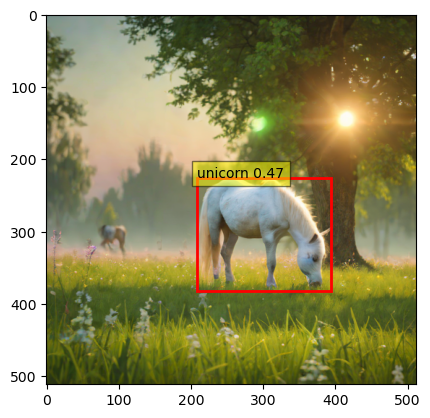

Box: [     140.92      126.28      415.76      389.93], Score: 0.5420697331428528, Label: unicorn


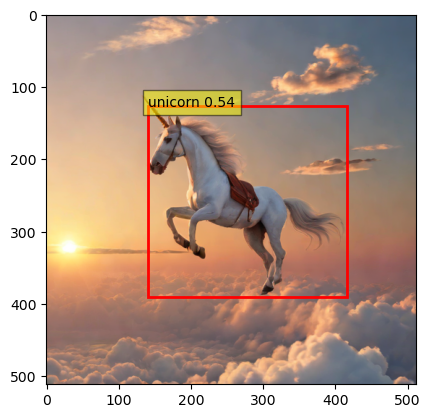

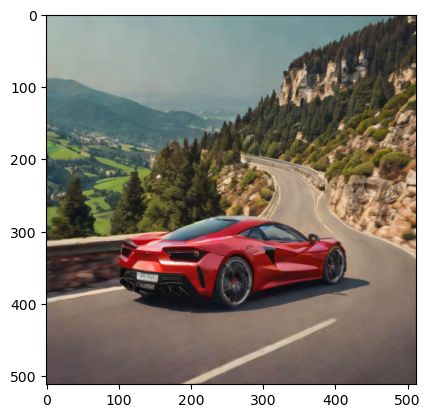

Box: [      73.05      107.93      408.36      199.34], Score: 0.6875981688499451, Label: aeroplane
Box: [     128.92       21.94      165.37      49.919], Score: 0.4399222433567047, Label: aeroplane
Box: [     104.84      406.29       111.4      411.63], Score: 0.2450428307056427, Label: car
Box: [     97.395       429.6      103.53      436.15], Score: 0.21285545825958252, Label: car
Box: [     121.97      393.45      127.85      399.39], Score: 0.2124352604150772, Label: car


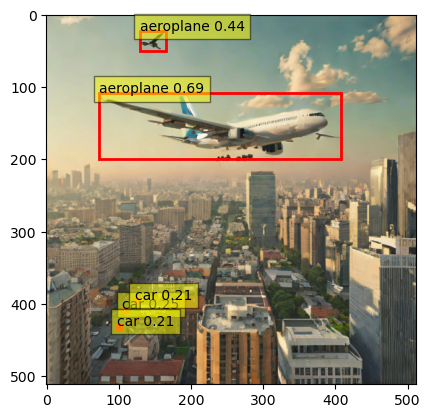

Box: [     17.841      73.424      477.49      218.51], Score: 0.7597893476486206, Label: aeroplane
Box: [     187.31      238.37      500.49       508.9], Score: 0.46628350019454956, Label: person


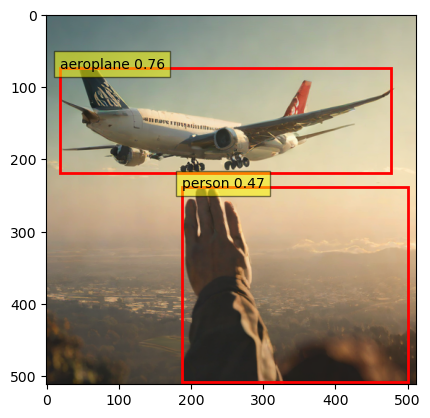

In [12]:
boxes_list = []
scores_list = []
labels_list = []

# Annotate images using OWLv2
for image, prompt_objs in zip(generated_images, prompt_objects):
    # Define prompts to guide the detection
    prompts = prompt_objs

    # Perform object detection
    boxes_batch, scores_batch, labels_batch = annotator.annotate_batch([image], prompts, conf_threshold=0.2, use_tta=True)
    boxes, scores, labels = boxes_batch[0], scores_batch[0], labels_batch[0]

    # Convert to numpy arrays
    if not isinstance(boxes, np.ndarray):
        boxes = boxes.detach().cpu().numpy()
    if not isinstance(scores, np.ndarray):
        scores = scores.detach().cpu().numpy()
    if not isinstance(labels, np.ndarray):
        labels = labels.detach().cpu().numpy()

    # Process the results
    for box, score, label in zip(boxes, scores, labels):
        if isinstance(label, np.int64):
            print(f"Box: {box}, Score: {score}, Label: {prompts[label]}")
        else:
            print(f"Box: {box}, Score: {score}, Label: {label}")


    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Iterate over each detection
    for box, score, label in zip(boxes, scores, labels):
        # Each box is (x1, y1, x2, y2)
        x1, y1, x2, y2 = box
        width, height = x2 - x1, y2 - y1
        rect = patches.Rectangle(
            (x1, y1), width, height, linewidth=2, edgecolor="r", facecolor="none"
        )
        ax.add_patch(rect)

        if isinstance(label, np.int64):
            label = prompts[label]

        plt.text(
            x1,
            y1,
            f"{label} {score:.2f}",
            bbox=dict(facecolor="yellow", alpha=0.5),
        )

    plt.show()